In [91]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as pgo

import glob
# import tensorflow as tf
# tf.test.gpu_device_name()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [92]:
import io
data_file = pd.read_excel('idGabarito.xlsx',sheet_name = "Planilha identificadores ITSM")
df = data_file

In [93]:
#Exploring data
df.head()


,Unnamed: 0,GRUPO_DONO_SERVICO,SOLICITANTE,ANALISTA,SERVICO,GRUPO_SOLUCIONADOR,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
0,0,NaN,Conceicao Aparecida Campanha Tassi,GPI - Danilo Gomes Moreno,CONCEDER BENEFICIOS,CSMOP SISTEMICO N2,1851,811,1034,705,732
1,1,NaN,Leandro Silva Da Cruz,Atos - Felipe Gonçalves da Silva,NaN,SERVICE DESK CYBERSERCURITY N1,1851,1247,591,1851,1558
2,2,NaN,Maria Cristina Messias dos Santos,Atos - Felipe Gonçalves da Silva,OUTLOOK,SERVICE DESK ATOS (FSN1),1851,1346,591,1417,1554
3,3,NaN,Vitor Cesar Lopes De Souza,Spread - José Luiz Cabral de Avelar,SERVICO DE PORTABILIDADE,COSIP/COIMP SISTEMICO N2,1851,1807,1687,1609,723
4,4,NaN,Rodolfo Leme Pezetta,Atos - Danilo Ribeiro Domingues,NaN,SERVICE DESK ATOS (FSN2),1851,1525,583,1851,1555


In [94]:
df.describe()

,Unnamed: 0,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.000000,67417.00000,67417.000000,67417.000000,67417.000000,67417.000000
mean,33708.000000,1740.08925,983.137918,882.045196,1330.632111,1190.576932
std,19461.755886,336.21293,524.983629,452.282687,489.573536,415.792922
min,0.000000,688.00000,6.000000,132.000000,0.000000,19.000000
25%,16854.000000,1851.00000,608.000000,603.000000,905.000000,730.000000
50%,33708.000000,1851.00000,1001.000000,630.000000,1466.000000,1554.000000
75%,50562.000000,1851.00000,1360.000000,1082.000000,1851.000000,1557.000000
max,67416.000000,1851.00000,1852.000000,1851.000000,1851.000000,1851.000000


In [95]:
df1 = pd.crosstab(index = [df['ID_SOLICITANTE'], df['ID_SERVICO']], columns = df['ID_ANALISTA'])
df1

ID_ANALISTA                132   133   134   139   141   151   153   156   \
ID_SOLICITANTE ID_SERVICO                                                   
6              686            0     0     0     0     0     0     0     0   
               905            0     0     0     0     0     0     0     0   
               1415           0     0     0     0     0     0     0     0   
               1851           0     0     0     0     0     0     0     0   
8              136            0     0     0     0     0     0     0     0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
1849           1851           0     0     0     0     0     0     0     0   
1850           1851           0     0     0     0     0     0     0     0   
1851           1851           0     0     0     0     0     0     0     0   
1852           905            0     0     0     0     0     0     0     0   
               1851           0     0     0     0     0     0     0     0   

ID_ANALISTA                157   158   ...  1802  1812  1814  1821  1827  \
ID_SOLICITANTE ID_SERVICO              ...                                 
6              686            0     0  ...     0     0     0     0     0   
               905            0     0  ...     0     0     0     0     0   
               1415           0     0  ...     0     0     0     0     0   
               1851           0     0  ...     0     0     0     0     0   
8              136            0     0  ...     0     0     0     0     0   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
1849           1851           0     0  ...     0     0     0     0     0   
1850           1851           0     0  ...     0     0     0     0     0   
1851           1851           0     0  ...     0     0     0     0     0   
1852           905            0     0  ...     0     0     0     0     0   
               1851           0     0  ...     0     0     0     0     0   

ID_ANALISTA                1835  1837  1841  1848  1851  
ID_SOLICITANTE ID_SERVICO                                
6              686            0     0     0     0     0  
               905            0     0     0     0     0  
               1415           0     0     0     0     0  
               1851           0     0     0     0     0  
8              136            0     0     0     0     3  
...                         ...   ...   ...   ...   ...  
1849           1851           0     0     0     0     0  
1850           1851           0     0     0     0     1  
1851           1851           0     0     0     0     3  
1852           905            0     0     0     0     0  
               1851           0     0     0     0     0  

[9743 rows x 226 columns]

In [96]:
df1.reset_index()

ID_ANALISTA,ID_SOLICITANTE,ID_SERVICO,132,133,134,139,141,151,153,156,...,1802,1812,1814,1821,1827,1835,1837,1841,1848,1851
0,6,686,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1851,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,1849,1851,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,1850,1851,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9740,1851,1851,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9741,1852,905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Definindo função para validar probabilidade de aparecer determinado Grupo Solucionador
def probStatus(dataset, group_by):
#   df1 = pd.crosstab(index = [df['ID_SOLICITANTE'], df['ID_SERVICO']], columns = [df['ID_GRUPO_SOLUCIONADOR'], df['ID_ANALISTA']]).reset_index()
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['ID_ANALISTA']).reset_index()
    df1['Yes'] = df1.iloc[:,2:].sum(axis =1)
    df1['No'] = (df1 == 0).sum(axis = 1)
    df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
    return df1[[group_by, 'probShowUp']]


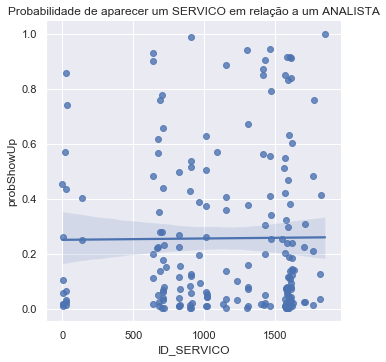

In [98]:

# Probabilidade de relação entre serviço e grupo solucionador
sns.lmplot(data = probStatus(df, 'ID_SERVICO'), x = 'ID_SERVICO', y = 'probShowUp', fit_reg = True)
plt.xlim()
plt.title('Probabilidade de aparecer um SERVICO em relação a um ANALISTA')
plt.show()


In [99]:
df1['Yes'] = df1.iloc[:,2:].sum(axis =1).astype(int)
df1['No'] = (df1 == 0).sum(axis = 1)
df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
df1

ID_ANALISTA                132  133  134  139  141  151  153  156  157  158  \
ID_SOLICITANTE ID_SERVICO                                                     
6              686           0    0    0    0    0    0    0    0    0    0   
               905           0    0    0    0    0    0    0    0    0    0   
               1415          0    0    0    0    0    0    0    0    0    0   
               1851          0    0    0    0    0    0    0    0    0    0   
8              136           0    0    0    0    0    0    0    0    0    0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1849           1851          0    0    0    0    0    0    0    0    0    0   
1850           1851          0    0    0    0    0    0    0    0    0    0   
1851           1851          0    0    0    0    0    0    0    0    0    0   
1852           905           0    0    0    0    0    0    0    0    0    0   
               1851          0    0    0    0    0    0    0    0    0    0   

ID_ANALISTA                ...  1821  1827  1835  1837  1841  1848  1851  Yes  \
ID_SOLICITANTE ID_SERVICO  ...                                                  
6              686         ...     0     0     0     0     0     0     0    1   
               905         ...     0     0     0     0     0     0     0    6   
               1415        ...     0     0     0     0     0     0     0    1   
               1851        ...     0     0     0     0     0     0     0    7   
8              136         ...     0     0     0     0     0     0     3    3   
...                        ...   ...   ...   ...   ...   ...   ...   ...  ...   
1849           1851        ...     0     0     0     0     0     0     0    3   
1850           1851        ...     0     0     0     0     0     0     1    4   
1851           1851        ...     0     0     0     0     0     0     3    3   
1852           905         ...     0     0     0     0     0     0     0    5   
               1851        ...     0     0     0     0     0     0     0    1   

ID_ANALISTA                 No  probShowUp  
ID_SOLICITANTE ID_SERVICO                   
6              686         225    0.004425  
               905         221    0.026432  
               1415        225    0.004425  
               1851        220    0.030837  
8              136         225    0.013158  
...                        ...         ...  
1849           1851        223    0.013274  
1850           1851        223    0.017621  
1851           1851        225    0.013158  
1852           905         224    0.021834  
               1851        225    0.004425  

[9743 rows x 229 columns]

In [104]:
df1.nunique()

ID_ANALISTA
132             2
133             3
134             4
139            30
141            13
             ... 
1848            3
1851           29
Yes           159
No             35
probShowUp    588
Length: 229, dtype: int64

In [102]:
#Agrupamento de qtde de serviço por solicitante vs analista
sub_df = df.groupby(['ID_SOLICITANTE', 'ID_SERVICO']).ID_ANALISTA.nunique().reset_index()
sub_df.columns = ['ID_ANALISTA','ID_SOLICITANTE','QTD_SOLICITANTE']
sub_df['ID_SERVICO'] = df['ID_SERVICO']
sub_df['ID_ANALISTA'] = df['ID_ANALISTA']
sub_df['ID_SOLICITANTE'] = df['ID_SOLICITANTE']
sub_df


,ID_ANALISTA,ID_SOLICITANTE,QTD_SOLICITANTE,ID_SERVICO
0,1034,811,1,705
1,591,1247,5,1851
2,591,1346,1,1417
3,1687,1807,6,1609
4,583,1525,1,1851
...,...,...,...,...
9738,583,1227,3,905
9739,583,1227,3,905
9740,615,1226,1,1851
9741,1798,1034,2,638


In [85]:
#Quantidades
sub_df.nunique()

ID_ANALISTA        106
ID_SOLICITANTE     874
QTD_SOLICITANTE     34
ID_SERVICO         151
dtype: int64

In [ ]:
# plotting bar chart qtd_servico
ax = df1.plot.bar(figsize= (30,10), legend = False, stacked = True)
plt.title("Quantidade de SOLICITANTES por ANALISTA", size = 14)
ax.set_ylabel('Quantidade de Solicitantes', size = 14)
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize= 9)


plt.show()

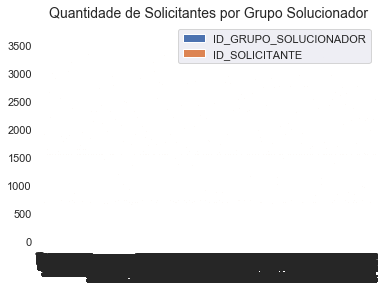

In [254]:
# plotting bar chart
df2 = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SOLICITANTE']]
ax = df2.plot.bar(  stacked = True)
plt.title("Quantidade de Solicitantes por Grupo Solucionador", size = 14)
plt.ylim()


plt.show()

In [ ]:

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SOLICITANTE', 'ID_GRUPO_SOLUCIONADOR']].iloc[:len(df)]
df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SOLICITANTE']].iloc[:len(df)]


kmeans.fit(df_kmeans)

df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO', colormap='viridis', figsize=(15, 10))
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

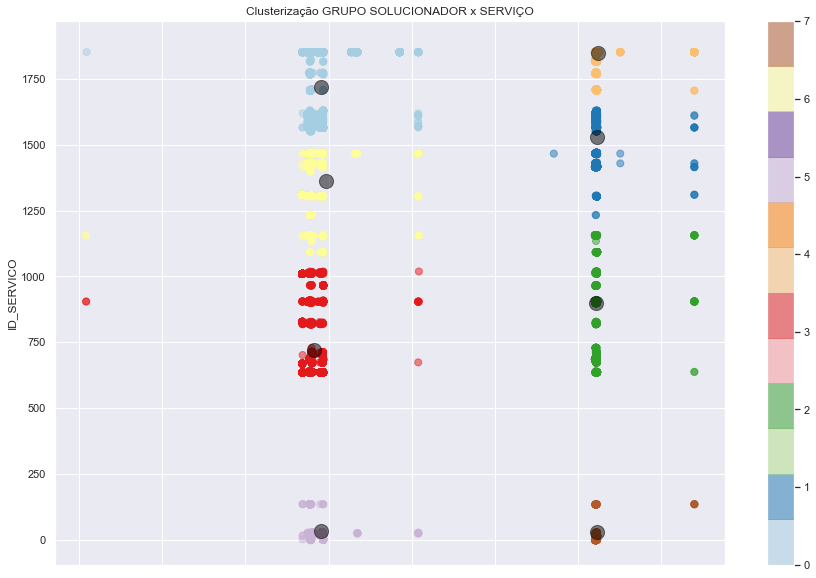

In [31]:

clusters = 8
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SOLICITANTE']].iloc[:len(df)]


model = kmeans.fit(df_kmeans)
y_pred = kmeans.predict(df_kmeans) #predicting labels (y) and saving to y_pred 
centers = kmeans.cluster_centers_ #cluster centers as determined by the k-means estimator

#ploting cluster
df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SOLICITANTE',c=y_pred, cmap=plt.cm.Paired, figsize=(15, 10), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusterização GRUPO SOLUCIONADOR x SOLICITANTE')



In [48]:
#Show the cluster
df['cluster'] = y_pred
df.iloc[:60]

C:\Users\barba\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,GRUPO_SOLUCIONADOR,cluster
0,1851,811,1034,705,732,CSMOP SISTEMICO N2,3
1,1851,1247,591,1851,1558,SERVICE DESK CYBERSERCURITY N1,4
2,1851,1346,591,1417,1554,SERVICE DESK ATOS (FSN1),1
3,1851,1807,1687,1609,723,COSIP/COIMP SISTEMICO N2,0
4,1851,1525,583,1851,1555,SERVICE DESK ATOS (FSN2),4
5,1851,1194,1146,1612,694,COAIS INFRAESTRUTURA,0
6,1851,1207,632,905,1554,SERVICE DESK ATOS (FSN1),2
7,1851,1547,973,673,732,CSMOP SISTEMICO N2,3
8,1851,1813,893,1466,687,CIGEC SISTEMICO N2,6
9,1851,1174,624,1609,1557,SERVICE DESK ATOS SISTEMICO N1,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df_cluster = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].values
df_cluster
# cluster.fit_predict(df_cluster)

# plt.figure(figsize=(10, 7))
# plt.scatter(df_cluster.ID_GRUPO_SOLUCIONADOR, df_cluster.ID_SERVICO, c=cluster.labels_, cmap='rainbow')
